In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

Read data from csv file

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/KAIR-ISZ/public_lectures/master/Data%20Analytics%202022/Lab%205%20-%20General%20Linear%20Models/logistic_reg_data.csv")#, index_col="Unnamed: 0")
data.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,249.500000,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,144.481833,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,0.000000,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,124.750000,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,249.500000,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,374.250000,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,499.000000,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


Prior selection

In [3]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


1. Plot histograms of beta for prior model

(array([[  3.,  19.,  73., 180., 271., 267., 134.,  42.,  10.,   1.],
        [  2.,  12.,  93., 211., 274., 246., 116.,  38.,   8.,   0.],
        [  1.,  21.,  76., 186., 292., 246., 123.,  45.,  10.,   0.],
        [  3.,  18.,  65., 184., 275., 269., 128.,  47.,  10.,   1.],
        [  2.,  23.,  69., 171., 275., 266., 140.,  46.,   6.,   2.]]),
 array([-35.1106 , -27.75023, -20.38986, -13.02949,  -5.66912,   1.69125,
          9.05162,  16.41199,  23.77236,  31.13273,  38.4931 ]),
 <a list of 5 BarContainer objects>)

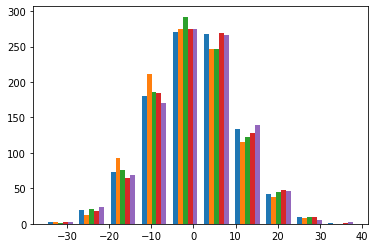

In [5]:
#sim_ppc1_db= sim_ppc1.draws_pd()
#sim_ppc1_db.head()
plt.hist(sim_ppc1.stan_variable('beta'))

2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.

In [6]:
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=2)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


(array([[  3.,  19.,  73., 180., 271., 267., 134.,  42.,  10.,   1.],
        [  2.,  12.,  93., 211., 274., 246., 116.,  38.,   8.,   0.],
        [  1.,  21.,  76., 186., 292., 246., 123.,  45.,  10.,   0.],
        [  3.,  18.,  65., 184., 275., 269., 128.,  47.,  10.,   1.],
        [  2.,  23.,  69., 171., 275., 266., 140.,  46.,   6.,   2.]]),
 array([-7.02212 , -5.550047, -4.077974, -2.605901, -1.133828,  0.338245,
         1.810318,  3.282391,  4.754464,  6.226537,  7.69861 ]),
 <a list of 5 BarContainer objects>)

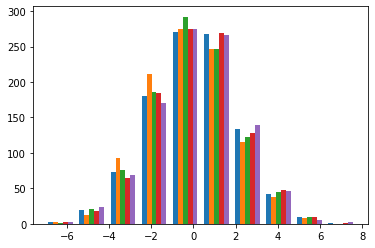

In [7]:
plt.hist(sim_ppc1.stan_variable('beta'))

In [12]:
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=0.75)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


(array([[  3.,  19.,  73., 180., 271., 267., 134.,  42.,  10.,   1.],
        [  2.,  12.,  93., 211., 274., 246., 116.,  38.,   8.,   0.],
        [  1.,  21.,  76., 186., 292., 246., 123.,  45.,  10.,   0.],
        [  3.,  18.,  65., 184., 275., 269., 128.,  47.,  10.,   1.],
        [  2.,  23.,  69., 171., 275., 266., 140.,  46.,   6.,   2.]]),
 array([-2.63329 , -2.081263, -1.529236, -0.977209, -0.425182,  0.126845,
         0.678872,  1.230899,  1.782926,  2.334953,  2.88698 ]),
 <a list of 5 BarContainer objects>)

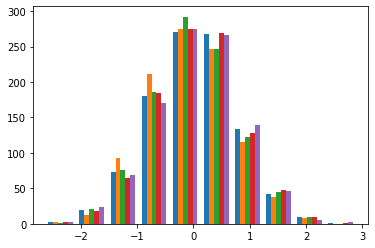

In [9]:
plt.hist(sim_ppc1.stan_variable('beta'))

Posterior inference

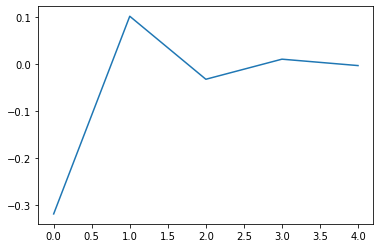

In [11]:
plt.plot([-0.318816202421763,0.101643770926634,-0.0324056810466571,0.0103314561681861,-0.0032938356210279])


Posterior inference

In [13]:
model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [14]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:05 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:05 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:06 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:06 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 


INFO:cmdstanpy:CmdStan done processing.


In [15]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

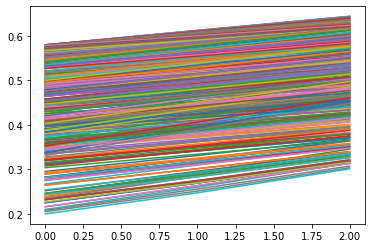

In [16]:
plt.plot(med_prob_ppc)
plt.show()

In [22]:
fit_pd=fit.draws_pd()
fit_pd.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],...,prob_ppc[491],prob_ppc[492],prob_ppc[493],prob_ppc[494],prob_ppc[495],prob_ppc[496],prob_ppc[497],prob_ppc[498],prob_ppc[499],prob_ppc[500]
0,-338.090,0.927271,0.09655,5.0,31.0,0.0,343.799,-0.000063,0.481247,-0.655559,...,0.602965,0.573857,0.603185,0.318779,0.549084,0.320229,0.426176,0.464356,0.562588,0.337859
1,-337.858,0.959189,0.09655,6.0,63.0,0.0,339.511,-0.000285,0.880819,-0.321850,...,0.583231,0.515976,0.584979,0.222531,0.480158,0.224144,0.343873,0.351077,0.549139,0.244408
2,-340.441,0.836728,0.09655,4.0,31.0,0.0,344.477,-0.001669,0.464368,0.089349,...,0.454990,0.414604,0.455765,0.231534,0.397450,0.232438,0.325378,0.352070,0.455534,0.248788
3,-339.600,0.999785,0.09655,5.0,31.0,0.0,341.092,0.000382,0.472379,-0.620346,...,0.589761,0.561226,0.590091,0.225239,0.536891,0.227608,0.387967,0.337800,0.520407,0.254913
4,-340.968,0.941441,0.09655,5.0,47.0,0.0,342.564,-0.000123,1.031020,-1.141800,...,0.651684,0.589464,0.652208,0.204094,0.540705,0.205693,0.339157,0.285726,0.546381,0.225692


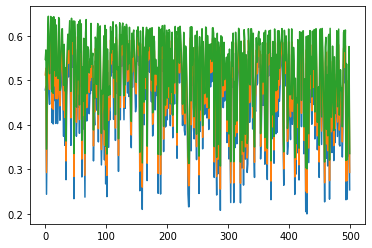

In [23]:
plt.plot(estimate_ppc_df)
plt.show()

(0.544, 0.444)

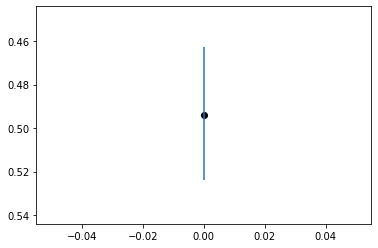

In [40]:
mean_med=estimate_ppc_df['med'].mean()
line_up = estimate_ppc_df['hi'].mean()-mean_med
line_down = mean_med - estimate_ppc_df['lo'].mean()
plt.errorbar(0,mean_med,[[line_down], [line_up]])
plt.scatter(0,data.y.values.mean(),color='k')
plt.ylim([data.y.values.mean()+0.05, data.y.values.mean()-0.05])